<a href="https://colab.research.google.com/github/sumedhakoranga/wikihow_most_helpful_article_predictor/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Initialization

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("wikihow.csv")
df.head()

,character_count,word_count,method_count,mean_method_size,mean_paragraph_size,size_largest_method,size_shortest_method,std_method_size,step_count,mean_steps_per_method,...,Kincaid,ARI,Coleman_Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,percent_helpful
0,7107,1508,2,3357.500000,379.823529,4321,2394,963.500000,16,8.000000,...,7.523760,8.159750,9.908877,67.453457,10.820887,36.866542,10.376433,3.264706,10.086871,78
1,5180,1176,2,2419.500000,317.000000,3171,1668,751.500000,14,7.000000,...,4.951055,5.505902,7.708411,81.614246,8.897157,33.807519,9.052403,2.652632,9.111023,99
2,3822,902,3,1114.333333,263.333333,1521,881,288.598144,11,3.666667,...,6.020412,6.727450,7.309495,81.109399,9.797251,31.810200,9.310165,2.527273,8.038576,88
3,11614,2429,3,3604.333333,393.111111,4148,2832,561.058721,26,8.666667,...,7.798307,8.728719,10.376311,66.362137,11.577962,38.743177,10.914639,3.584906,9.965255,82
4,9633,2004,4,2310.500000,535.411765,2753,1922,329.196370,16,4.000000,...,8.716429,9.423549,10.661749,61.827048,13.316999,42.773535,12.116729,4.327869,9.123631,100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19917 entries, 0 to 19916
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   character_count                   19917 non-null  int64  
 1   word_count                        19917 non-null  int64  
 2   method_count                      19917 non-null  int64  
 3   mean_method_size                  19917 non-null  float64
 4   mean_paragraph_size               19917 non-null  float64
 5   size_largest_method               19917 non-null  int64  
 6   size_shortest_method              19917 non-null  int64  
 7   std_method_size                   19917 non-null  float64
 8   step_count                        19917 non-null  int64  
 9   mean_steps_per_method             19917 non-null  float64
 10  introduction_size                 19917 non-null  int64  
 11  summary_size                      19917 non-null  int64  
 12  refe

####All our given features are numerical.

In [ ]:
df.describe()

,character_count,word_count,method_count,mean_method_size,mean_paragraph_size,size_largest_method,size_shortest_method,std_method_size,step_count,mean_steps_per_method,...,Kincaid,ARI,Coleman_Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,percent_helpful
count,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,...,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.000000,19917.00000
mean,6464.873023,1469.306723,3.122508,2019.712830,365.109300,2632.425365,1475.179696,495.042789,15.351459,5.078788,...,5.865233,6.664585,7.940235,79.537715,9.648025,32.817879,9.299388,2.685554,8.797033,87.90596
std,2883.777988,635.526879,1.150353,870.291473,141.042703,1229.746922,722.206039,399.215274,5.465800,1.515980,...,1.785608,1.813711,1.681774,10.894442,1.850669,5.629854,1.420950,0.893512,0.906490,6.95029
min,489.000000,110.000000,1.000000,113.636364,5.285714,145.000000,5.000000,0.000000,4.000000,0.916667,...,-1.368682,-1.015958,-0.510905,30.674616,2.988070,11.393484,4.290994,0.315789,5.934804,50.00000
25%,4502.000000,1043.000000,3.000000,1446.666667,274.000000,1817.000000,993.000000,223.069994,12.000000,4.000000,...,4.592827,5.400488,6.741477,72.614510,8.316755,28.831439,8.273033,2.042857,8.172361,83.00000
50%,5999.000000,1372.000000,3.000000,1905.666667,353.266667,2426.000000,1376.000000,401.184107,14.000000,5.000000,...,5.758338,6.547967,7.793182,80.357867,9.467206,32.378327,9.205926,2.567568,8.720730,88.00000
75%,7845.000000,1776.000000,3.000000,2462.625000,443.866667,3224.000000,1833.000000,660.061782,18.000000,5.750000,...,7.030684,7.794361,8.996336,87.309031,10.795892,36.382463,10.231298,3.200000,9.330471,93.00000
max,46657.000000,10348.000000,32.000000,10598.000000,2009.250000,22624.000000,8739.000000,8086.895805,135.000000,37.000000,...,14.140287,19.907310,15.892796,122.165513,19.733495,67.665113,15.595093,11.318681,15.674366,100.00000


##Finding missing values

In [ ]:
df.isnull().sum()

character_count                       0
word_count                            0
method_count                          0
mean_method_size                      0
mean_paragraph_size                   0
size_largest_method                   0
size_shortest_method                  0
std_method_size                       0
step_count                            0
mean_steps_per_method                 0
introduction_size                     0
summary_size                          0
references_count                    926
references_count_per_text_length    926
references_count_per_method         926
image_count                           0
image_count_per_method                0
num_votes                             0
is_expert                             0
views                                96
co_authors                           96
warnings                              0
tips                                  0
to_be_verb                            0
aux_verb                              0


#To fill the missing values
The methodology use is:

1) Fill with mean if the feature has Gaussian distribution

2) Fill with meadian otherwise

To find if the feature is Gaussian or not we will plot histograms of target varibale

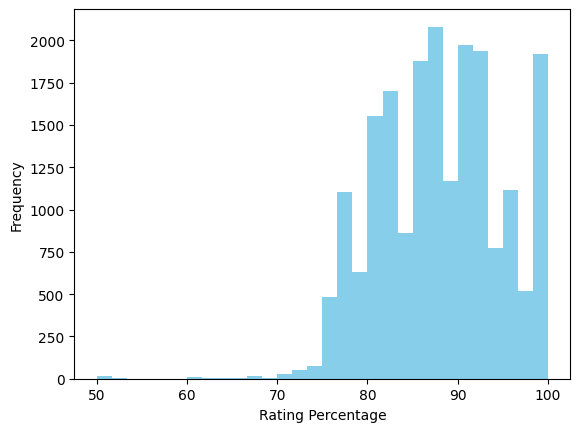

In [ ]:
plt.hist(df.percent_helpful, bins = 30, color='skyblue')
plt.xlabel('Rating Percentage')
plt.ylabel('Frequency')

plt.show()

##Histogram for all the features having missing values

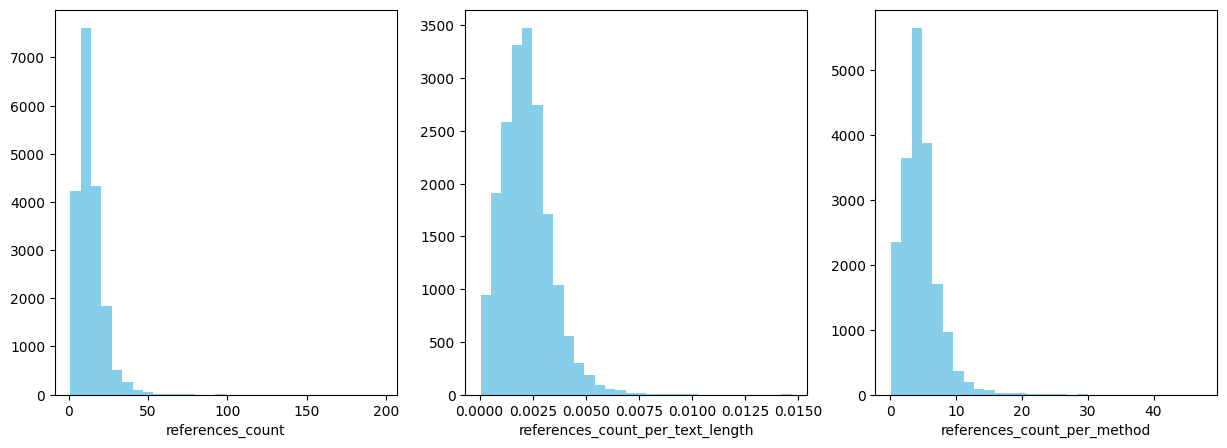

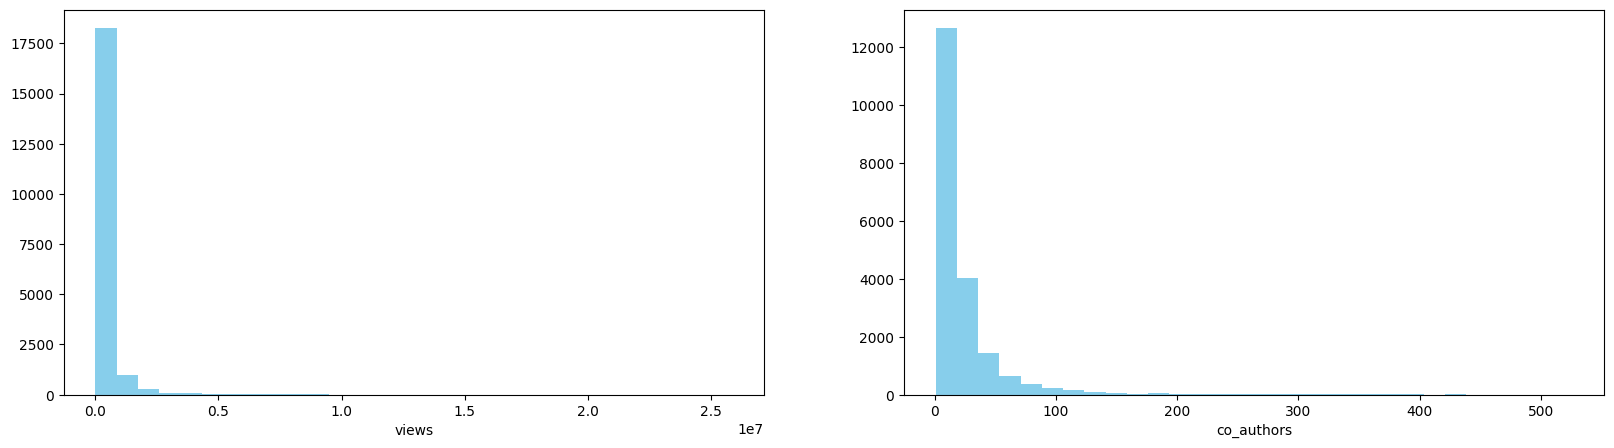

In [ ]:
fig, axis = plt.subplots(1, 3, figsize=(15,5))
for i, c in enumerate(['references_count', 'references_count_per_text_length', 'references_count_per_method']):
    axis[i].hist(df[c], bins=30, color='skyblue')
    axis[i].set_xlabel(c)

fig, axis = plt.subplots(1, 2, figsize=(19.88,5))
for i, c in enumerate(['views', 'co_authors']):
    axis[i].hist(df[c], bins=30, color='skyblue')
    axis[i].set_xlabel(c)

plt.show()

###Since none of our plots is creatinf a gaussian figure so we are going to fill the missing values with Median

In [ ]:
for attribute in ['references_count', 'references_count_per_text_length', 'references_count_per_method', 'views', 'co_authors']:
  df[attribute] = df[attribute].fillna(df[attribute].median())

In [ ]:
df.isnull().sum()

character_count                     0
word_count                          0
method_count                        0
mean_method_size                    0
mean_paragraph_size                 0
size_largest_method                 0
size_shortest_method                0
std_method_size                     0
step_count                          0
mean_steps_per_method               0
introduction_size                   0
summary_size                        0
references_count                    0
references_count_per_text_length    0
references_count_per_method         0
image_count                         0
image_count_per_method              0
num_votes                           0
is_expert                           0
views                               0
co_authors                          0
warnings                            0
tips                                0
to_be_verb                          0
aux_verb                            0
conjunction                         0
pronoun     

#Feature Redundance

##Feature-Feature Correlation

Next, we will look at correlation between features to find if there are any redundant features.

We will try to find linear correlation between features using Pearson's correlation coefficient and non-linear correlation using Spearman's correlation.

###Linear Correlation

In [ ]:
pearson_corr = df.drop('percent_helpful', axis=1).corr(method='pearson')
pearson_corr

,character_count,word_count,method_count,mean_method_size,mean_paragraph_size,size_largest_method,size_shortest_method,std_method_size,step_count,mean_steps_per_method,...,sentence_beginning_preposition,Kincaid,ARI,Coleman_Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex
character_count,1.000000,0.988764,0.282684,0.794190,0.698996,0.828598,0.589214,0.579474,0.541815,0.254914,...,0.538326,0.425547,0.436732,0.333617,-0.355762,0.441046,0.414626,0.418059,0.421090,0.201903
word_count,0.988764,1.000000,0.288452,0.782827,0.667653,0.815389,0.581864,0.567710,0.563880,0.277330,...,0.526581,0.324147,0.341326,0.203557,-0.235662,0.352021,0.308273,0.317717,0.317806,0.115529
method_count,0.282684,0.288452,1.000000,-0.214187,-0.035805,-0.091352,-0.296081,0.018580,0.451643,-0.290797,...,0.133057,-0.023578,-0.032113,-0.000779,0.003184,-0.025194,-0.015076,-0.010819,-0.017049,-0.003942
mean_method_size,0.794190,0.782827,-0.214187,1.000000,0.762631,0.921439,0.870765,0.563360,0.222027,0.461983,...,0.434816,0.452434,0.472045,0.328627,-0.358113,0.473116,0.434336,0.435781,0.445227,0.211722
mean_paragraph_size,0.698996,0.667653,-0.035805,0.762631,1.000000,0.718716,0.649067,0.448437,-0.139618,-0.148155,...,0.414813,0.603722,0.613435,0.458236,-0.502171,0.612574,0.578425,0.575702,0.591085,0.312241
size_largest_method,0.828598,0.815389,-0.091352,0.921439,0.718716,1.000000,0.648070,0.820605,0.310053,0.406030,...,0.450961,0.430648,0.454832,0.324648,-0.344239,0.452494,0.421165,0.420025,0.432525,0.228211
size_shortest_method,0.589214,0.581864,-0.296081,0.870765,0.649067,0.648070,1.000000,0.114329,0.082690,0.421472,...,0.325385,0.382537,0.392329,0.264266,-0.299253,0.396675,0.358844,0.361542,0.367194,0.150100
std_method_size,0.579474,0.567710,0.018580,0.563360,0.448437,0.820605,0.114329,1.000000,0.269782,0.235888,...,0.312355,0.272876,0.299178,0.219948,-0.219374,0.291607,0.278003,0.273505,0.287399,0.187036
step_count,0.541815,0.563880,0.451643,0.222027,-0.139618,0.310053,0.082690,0.269782,1.000000,0.572694,...,0.240554,-0.106171,-0.097085,-0.061228,0.084547,-0.089789,-0.088890,-0.076968,-0.087396,-0.066147
mean_steps_per_method,0.254914,0.277330,-0.290797,0.461983,-0.148155,0.406030,0.421472,0.235888,0.572694,1.000000,...,0.101601,-0.117732,-0.098487,-0.105237,0.120817,-0.092361,-0.107605,-0.096557,-0.102282,-0.071508


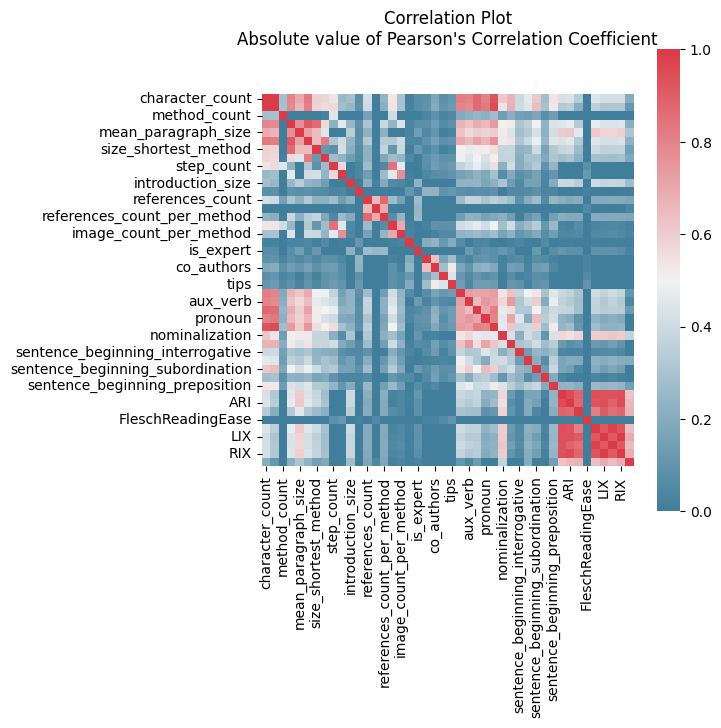

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Pearson's Correlation Coefficient\n\n")
sns.heatmap(pearson_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

###Non Linear Correlation

In [ ]:
spearman_corr = df.drop('percent_helpful', axis=1).corr(method='spearman')
spearman_corr

,character_count,word_count,method_count,mean_method_size,mean_paragraph_size,size_largest_method,size_shortest_method,std_method_size,step_count,mean_steps_per_method,...,sentence_beginning_preposition,Kincaid,ARI,Coleman_Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex
character_count,1.000000,0.987185,0.382224,0.809764,0.716238,0.834141,0.611749,0.552871,0.568180,0.302967,...,0.517851,0.460554,0.462206,0.369371,-0.398505,0.471542,0.444953,0.447958,0.455152,0.211985
word_count,0.987185,1.000000,0.389709,0.792921,0.675493,0.817735,0.598459,0.542369,0.595421,0.327925,...,0.504511,0.352038,0.358192,0.233605,-0.272668,0.377294,0.331519,0.341655,0.345419,0.116210
method_count,0.382224,0.389709,1.000000,-0.171152,-0.000587,-0.040237,-0.295216,0.124530,0.557108,-0.247584,...,0.174328,0.000738,-0.011675,0.036408,-0.029093,-0.007234,0.009015,0.013469,0.006244,-0.001376
mean_method_size,0.809764,0.792921,-0.171152,1.000000,0.763606,0.934045,0.856823,0.519212,0.276491,0.484521,...,0.440223,0.480912,0.490825,0.363550,-0.398072,0.498028,0.460032,0.460364,0.472245,0.220874
mean_paragraph_size,0.716238,0.675493,-0.000587,0.763606,1.000000,0.721740,0.659438,0.406629,-0.094127,-0.113931,...,0.441233,0.622858,0.617050,0.491036,-0.541363,0.622616,0.593999,0.588919,0.605884,0.301680
size_largest_method,0.834141,0.817735,-0.040237,0.934045,0.721740,1.000000,0.666877,0.753108,0.353426,0.452145,...,0.450770,0.465054,0.474834,0.362493,-0.389620,0.482204,0.448693,0.450394,0.459525,0.225167
size_shortest_method,0.611749,0.598459,-0.295216,0.856823,0.659438,0.666877,1.000000,0.101433,0.119515,0.408204,...,0.339786,0.405056,0.413057,0.290399,-0.328837,0.418159,0.382329,0.379714,0.394456,0.168289
std_method_size,0.552871,0.542369,0.124530,0.519212,0.406629,0.753108,0.101433,1.000000,0.323305,0.267492,...,0.300630,0.278389,0.283946,0.234836,-0.241186,0.288819,0.273283,0.277927,0.278693,0.152996
step_count,0.568180,0.595421,0.557108,0.276491,-0.094127,0.353426,0.119515,0.323305,1.000000,0.614877,...,0.234037,-0.066457,-0.064476,-0.039351,0.051266,-0.052623,-0.056741,-0.040669,-0.056547,-0.057019
mean_steps_per_method,0.302967,0.327925,-0.247584,0.484521,-0.113931,0.452145,0.408204,0.267492,0.614877,1.000000,...,0.107265,-0.082780,-0.069218,-0.084701,0.091902,-0.059251,-0.079327,-0.064863,-0.076768,-0.070396


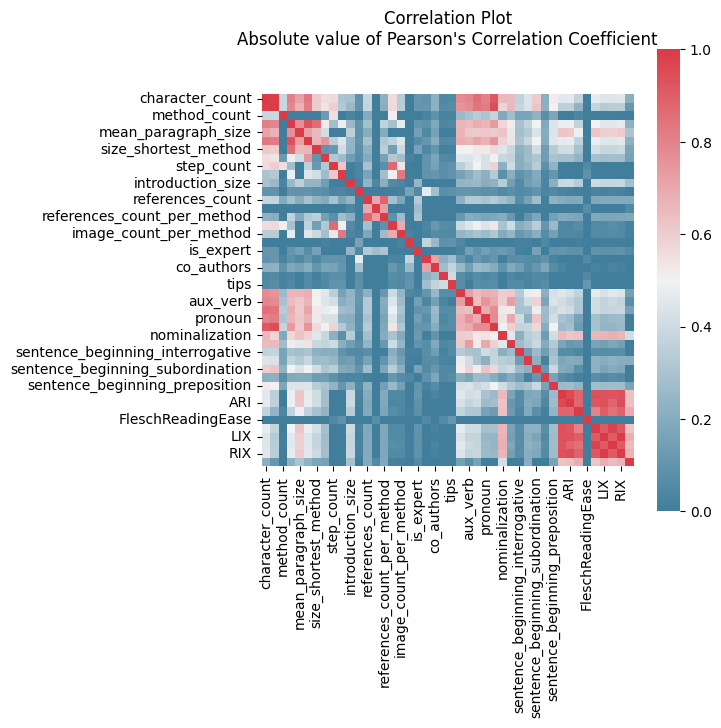

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Pearson's Correlation Coefficient\n\n")
sns.heatmap(spearman_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

##Feature-Target Correlation

In [ ]:
pearson_corr_target = df.drop('percent_helpful', axis=1).corrwith(df['percent_helpful'], method='pearson')
pearson_corr_target.sort_values()

co_authors                         -0.110067
num_votes                          -0.067924
tips                               -0.067206
FleschReadingEase                  -0.053102
sentence_beginning_conjunction     -0.052129
views                              -0.043096
to_be_verb                         -0.030818
pronoun                            -0.028787
warnings                           -0.022456
mean_steps_per_method              -0.009412
sentence_beginning_interrogative   -0.006815
step_count                         -0.006530
std_method_size                    -0.003368
sentence_beginning_pronoun         -0.002845
image_count_per_method              0.001668
preposition                         0.002750
image_count                         0.003376
size_largest_method                 0.003840
sentence_beginning_subordination    0.003871
word_count                          0.006774
mean_method_size                    0.007221
sentence_beginning_preposition      0.007369
mean_parag

The closer the value to 1 the more important the feature is in predicting the result. So we can colclude, `is_expert` is most important and `co_authors` is least important feature

In [ ]:
spearman_corr_target = df.drop('percent_helpful', axis=1).corrwith(df['percent_helpful'], method='spearman')
spearman_corr_target.sort_values()

num_votes                          -0.188499
co_authors                         -0.133895
views                              -0.081796
tips                               -0.053699
sentence_beginning_conjunction     -0.052846
FleschReadingEase                  -0.052516
to_be_verb                         -0.030203
pronoun                            -0.025295
warnings                           -0.018203
sentence_beginning_interrogative   -0.014812
nominalization                     -0.002250
sentence_beginning_pronoun         -0.001815
std_method_size                    -0.001593
size_largest_method                 0.005722
mean_steps_per_method               0.005787
preposition                         0.005801
mean_paragraph_size                 0.008202
step_count                          0.008600
mean_method_size                    0.008891
word_count                          0.009642
method_count                        0.011820
image_count_per_method              0.013298
size_short

The closer the value to 1 the more important the feature is in predicting the result. So we can colclude, `is_expert` is most important and `num_votes` is least important feature